# 0. 데이터 로드

In [1]:
# 기본 라이브러리
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 전처리
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Classification 모델
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Regression 모델
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# 평가 지표
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix, roc_auc_score,
    mean_absolute_error, mean_squared_error, r2_score
)

# PyTorch (FT Transformer용)
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# 기타
import gc

# 시각화 설정
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

# 랜덤 시드 고정
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)
torch.manual_seed(RANDOM_STATE)

print("✅ 라이브러리 로드 완료")

✅ 라이브러리 로드 완료


In [2]:
import math

In [3]:
# Google Colab 사용 시 실행
from google.colab import drive
drive.mount('/content/drive')

# 한글 폰트 설정 (Colab)
!apt-get install -y fonts-nanum > /dev/null
from matplotlib import font_manager
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_manager.fontManager.addfont(font_path)
plt.rc('font', family='NanumGothic')
plt.rc('axes', unicode_minus=False)

Mounted at /content/drive


In [6]:
DATA_PATH = '/content/drive/MyDrive/25-2R/School/기계학습/data/credit_score_cleaned_train.csv'  # 경로 수정 필요

df = pd.read_csv(DATA_PATH)
print(f"✅ 데이터 로드 완료: {df.shape[0]:,}개 행, {df.shape[1]}개 열")

✅ 데이터 로드 완료: 96,696개 행, 28개 열


# 1. 데이터 구조

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96696 entries, 0 to 96695
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        96696 non-null  object 
 1   customer_id               96696 non-null  object 
 2   month                     96696 non-null  object 
 3   name                      96696 non-null  object 
 4   age                       96696 non-null  int64  
 5   ssn                       96696 non-null  object 
 6   occupation                96696 non-null  object 
 7   annual_income             96696 non-null  float64
 8   monthly_inhand_salary     96696 non-null  float64
 9   credit_history_age        96696 non-null  int64  
 10  total_emi_per_month       96696 non-null  float64
 11  num_bank_accounts         96696 non-null  int64  
 12  num_credit_card           96696 non-null  int64  
 13  interest_rate             96696 non-null  int64  
 14  num_of

In [8]:
df.head()

,id,customer_id,month,name,age,ssn,occupation,annual_income,monthly_inhand_salary,credit_history_age,...,changed_credit_limit,num_credit_inquiries,credit_mix,outstanding_debt,credit_utilization_ratio,payment_of_min_amount,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.8434,89,...,11.27,4,Good,809.98,26.822620,No,80.415300,High_spent_Small_value_payments,312.49408,2
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.8434,93,...,11.27,4,Good,809.98,31.944960,No,118.280220,Low_spent_Large_value_payments,284.62915,2
2,0x1604,CUS_0xd40,March,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.8434,91,...,11.27,4,Good,809.98,28.609352,No,81.699524,Low_spent_Medium_value_payments,331.20987,2
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.8434,92,...,6.27,4,Good,809.98,31.377861,No,199.458070,Low_spent_Small_value_payments,223.45131,2
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.8434,93,...,11.27,4,Good,809.98,24.797346,No,41.420155,High_spent_Medium_value_payments,341.48923,2


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,96696.0,33.942448,10.377550,16.00000,25.000000,34.000000,42.000000,56.0000
annual_income,96696.0,50898.597475,38543.773796,7006.03500,19480.040000,37367.340000,72245.760000,179987.2800
monthly_inhand_salary,96696.0,4231.402393,3207.836030,303.64542,1634.720800,3116.120850,6016.623500,15204.6340
credit_history_age,96696.0,78.471529,33.291894,-1.00000,53.000000,78.000000,106.000000,147.0000
total_emi_per_month,96696.0,106.502641,130.404213,0.00000,28.636501,65.712006,145.756870,3776.0000
num_bank_accounts,96696.0,5.319134,2.597916,0.00000,3.000000,5.000000,7.000000,11.0000
num_credit_card,96696.0,5.498211,2.057083,0.00000,4.000000,5.000000,7.000000,11.0000
interest_rate,96696.0,14.347646,8.708524,1.00000,7.000000,13.000000,20.000000,34.0000
num_of_loan,96696.0,3.481344,2.435098,0.00000,2.000000,3.000000,5.000000,9.0000
delay_from_due_date,96696.0,20.806931,14.785004,-5.00000,10.000000,18.000000,28.000000,67.0000


In [10]:
df.describe(include="object").T

,count,unique,top,freq
id,96696,96696,0x25fed,1
customer_id,96696,12087,CUS_0x942c,8
month,96696,8,January,12087
name,96696,9859,Langep,48
ssn,96696,12087,078-73-5990,8
occupation,96696,15,Lawyer,6888
type_of_loan,96696,5981,['No Loan'],11312
credit_mix,96696,3,Standard,44048
payment_of_min_amount,96696,2,Yes,56128
payment_behaviour,96696,6,Low_spent_Small_value_payments,26503


# 2. 타깃 변수 분석

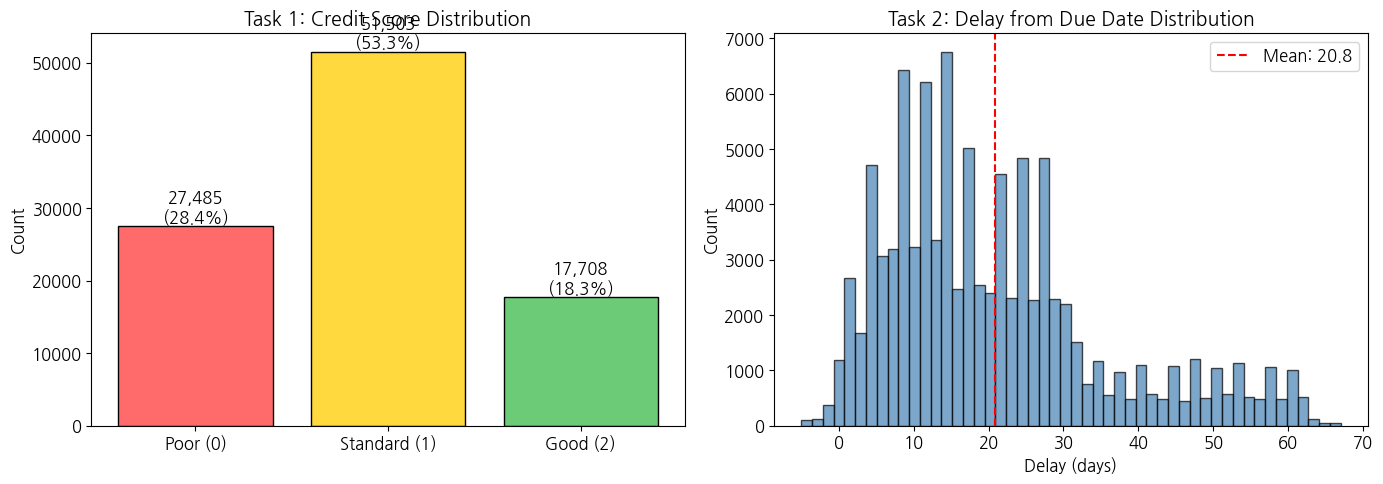


📊 Credit Score 분포:
credit_score
0    28.4%
1    53.3%
2    18.3%
Name: proportion, dtype: object


In [11]:
# Task 1: Credit Score 분포
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Credit Score 분포
credit_counts = df['credit_score'].value_counts().sort_index()
labels = ['Poor (0)', 'Standard (1)', 'Good (2)']
colors = ['#ff6b6b', '#ffd93d', '#6bcb77']

axes[0].bar(labels, credit_counts.values, color=colors, edgecolor='black')
axes[0].set_title('Task 1: Credit Score Distribution', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Count')
for i, v in enumerate(credit_counts.values):
    axes[0].text(i, v + 500, f'{v:,}\n({v/len(df)*100:.1f}%)', ha='center')

# Task 2: Delay from Due Date 분포
axes[1].hist(df['delay_from_due_date'], bins=50, color='steelblue', edgecolor='black', alpha=0.7)
axes[1].set_title('Task 2: Delay from Due Date Distribution', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Delay (days)')
axes[1].set_ylabel('Count')
axes[1].axvline(df['delay_from_due_date'].mean(), color='red', linestyle='--', label=f"Mean: {df['delay_from_due_date'].mean():.1f}")
axes[1].legend()

plt.tight_layout()
plt.show()

print("\n📊 Credit Score 분포:")
print(df['credit_score'].value_counts(normalize=True).sort_index().apply(lambda x: f"{x:.1%}"))

# 3. 주요 변수 데이터 분포 및 이상치 탐색

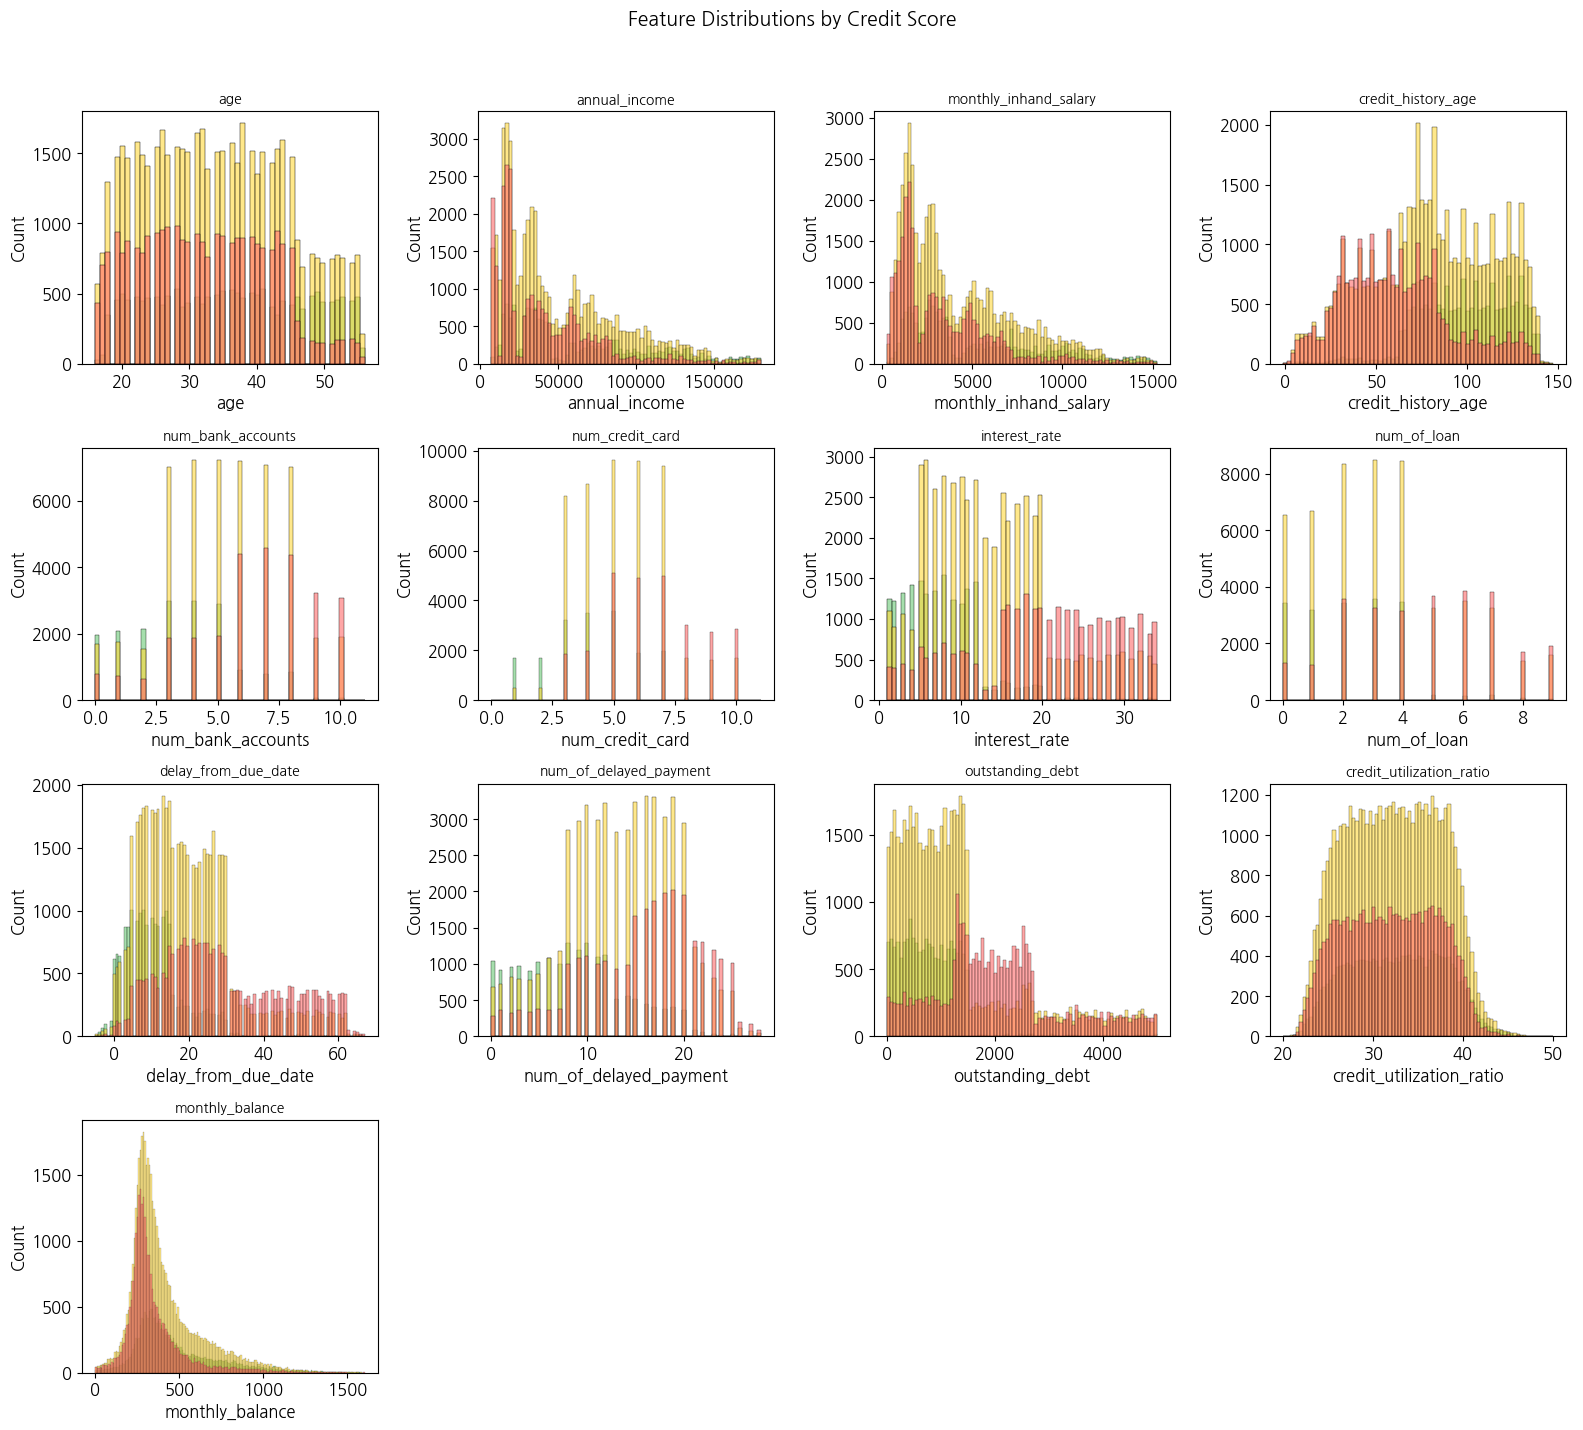

In [12]:
# 수치형 변수 선택
numeric_cols = ['age', 'annual_income', 'monthly_inhand_salary', 'credit_history_age',
                'num_bank_accounts', 'num_credit_card', 'interest_rate', 'num_of_loan',
                'delay_from_due_date', 'num_of_delayed_payment', 'outstanding_debt',
                'credit_utilization_ratio', 'monthly_balance']

# 분포 시각화
fig, axes = plt.subplots(4, 4, figsize=(16, 14))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    if col in df.columns:
        sns.histplot(data=df, x=col, hue='credit_score', ax=axes[i], palette=['#ff6b6b', '#ffd93d', '#6bcb77'], alpha=0.6)
        axes[i].set_title(col, fontsize=10)
        axes[i].legend([], frameon=False)

# 빈 subplot 제거
for j in range(len(numeric_cols), len(axes)):
    fig.delaxes(axes[j])

plt.suptitle('Feature Distributions by Credit Score', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

## 3.1. Classification Task를 위한 EDA

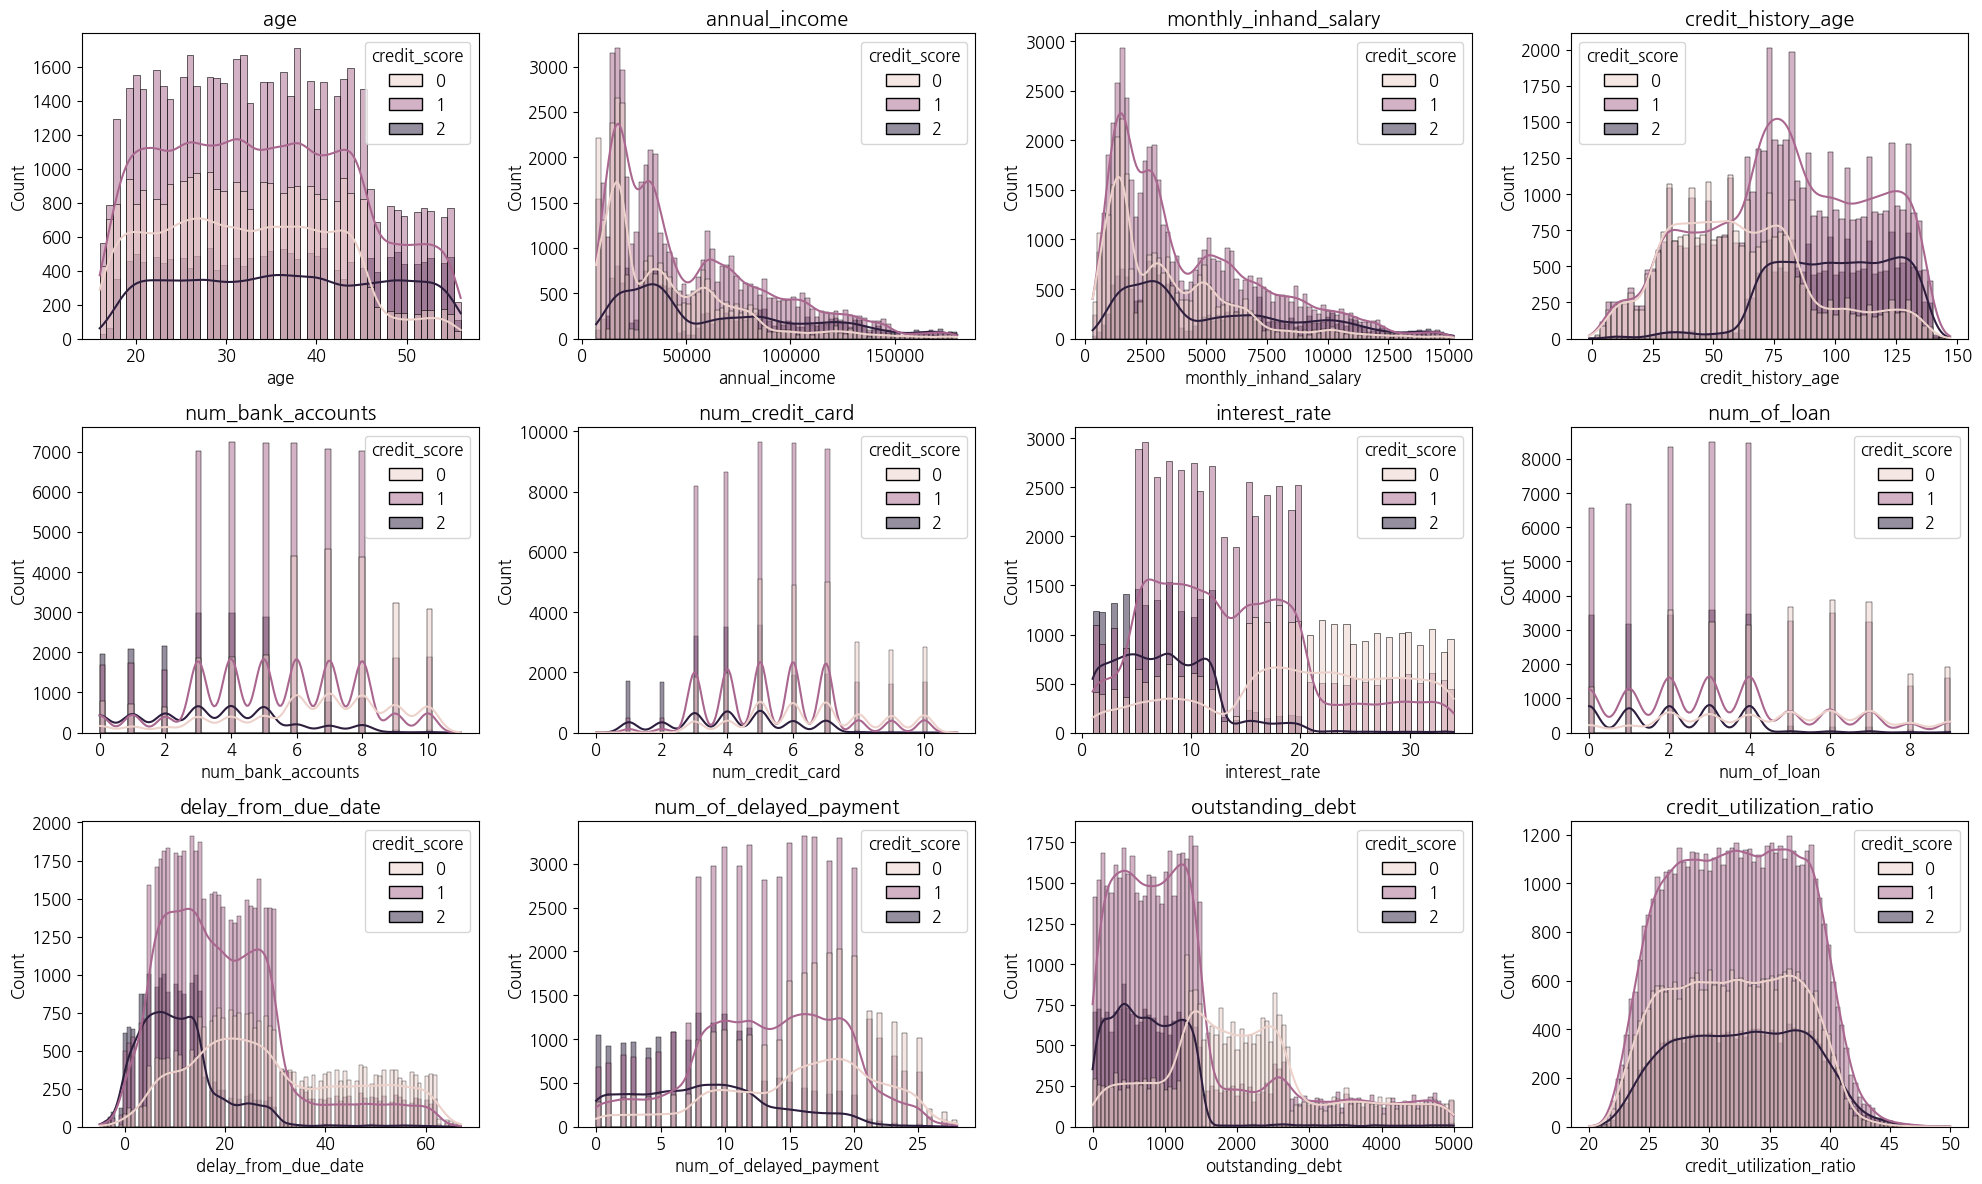

In [13]:
hue_feature = df.columns[-1]

# Get all numerical features except the target
features = numeric_cols[:-1]

# Define the layout for the plots
n_cols = 4 # Specify the number of columns here
n_rows = math.ceil(len(features) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))
axes = axes.flatten()
plt.subplots_adjust(hspace=0.5)

# Plotting
for i, feature in enumerate(features):
    sns.histplot(data=df, x=feature, hue=hue_feature, kde=True, ax=axes[i])
    axes[i].set_title(f'{feature}')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## 3.2. Regression Task를 위한 EDA

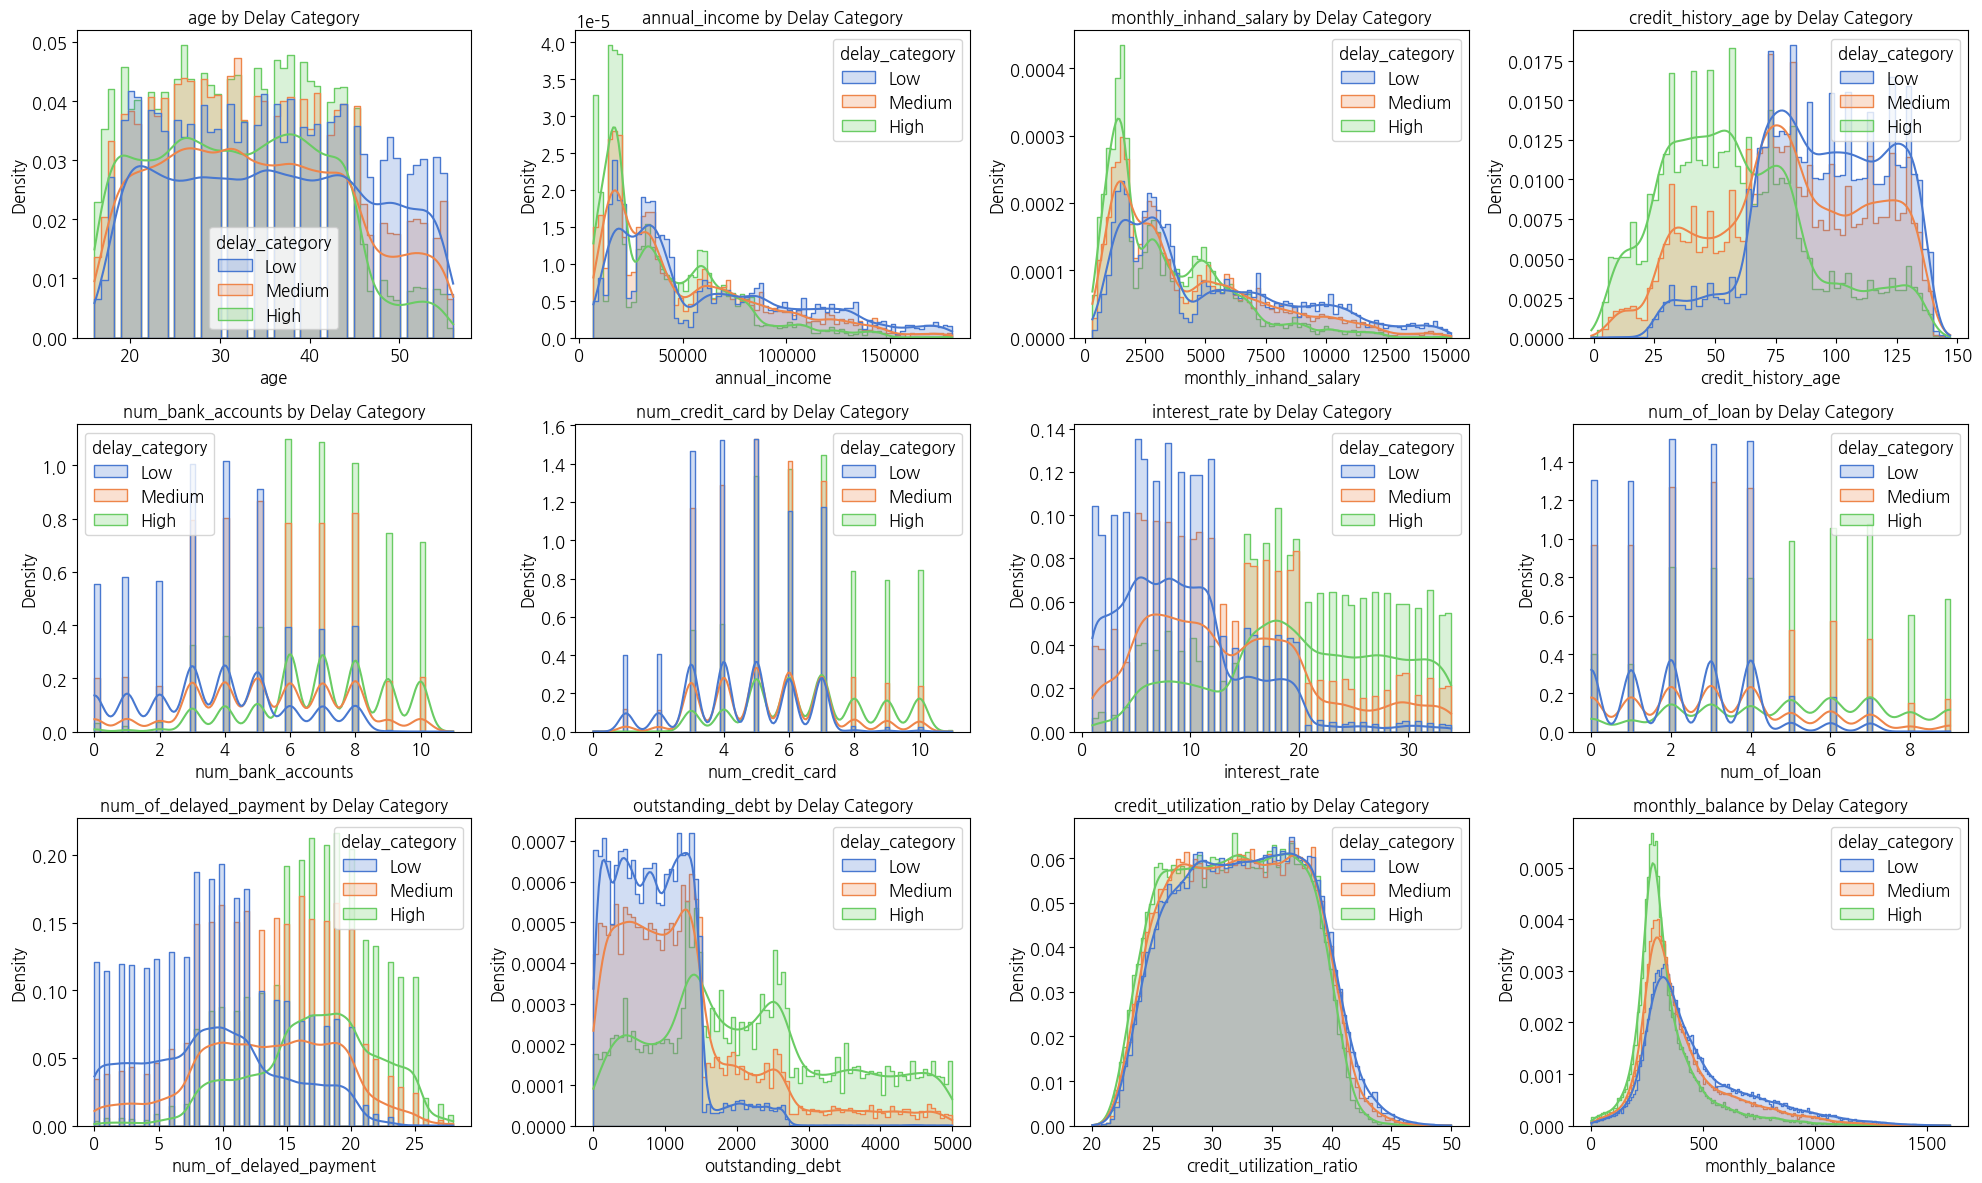

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import math

# 1️⃣ 타깃 범주 생성 (지연정도 3등분)
df['delay_category'] = pd.qcut(df['delay_from_due_date'], q=3, labels=['Low', 'Medium', 'High'])

# 2️⃣ hue로 사용할 열
hue_feature = 'delay_category'

# 3️⃣ hue 컬럼은 제외한 나머지 수치형 변수 선택
features = [col for col in numeric_cols if col not in ['delay_from_due_date', hue_feature]]

# 4️⃣ subplot 설정
n_cols = 4
n_rows = math.ceil(len(features) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))
axes = axes.flatten()
plt.subplots_adjust(hspace=0.5)

# 5️⃣ 각 수치형 변수별 히스토그램 (delay_category에 따른 분포 비교)
for i, feature in enumerate(features):
    sns.histplot(
        data=df,
        x=feature,
        hue=hue_feature,
        kde=True,
        ax=axes[i],
        palette='muted',
        element='step',
        stat='density',
        common_norm=False
    )
    axes[i].set_title(f'{feature} by Delay Category', fontsize=12)
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel("Density")

# 남는 subplot 제거
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


# 4. 변수 간 관계 탐색

## 4.1. 히트맵

In [15]:
sns.set_style("whitegrid")

In [16]:
numeric_df = df.select_dtypes(include="number")
correlation_matrix = numeric_df.corr()

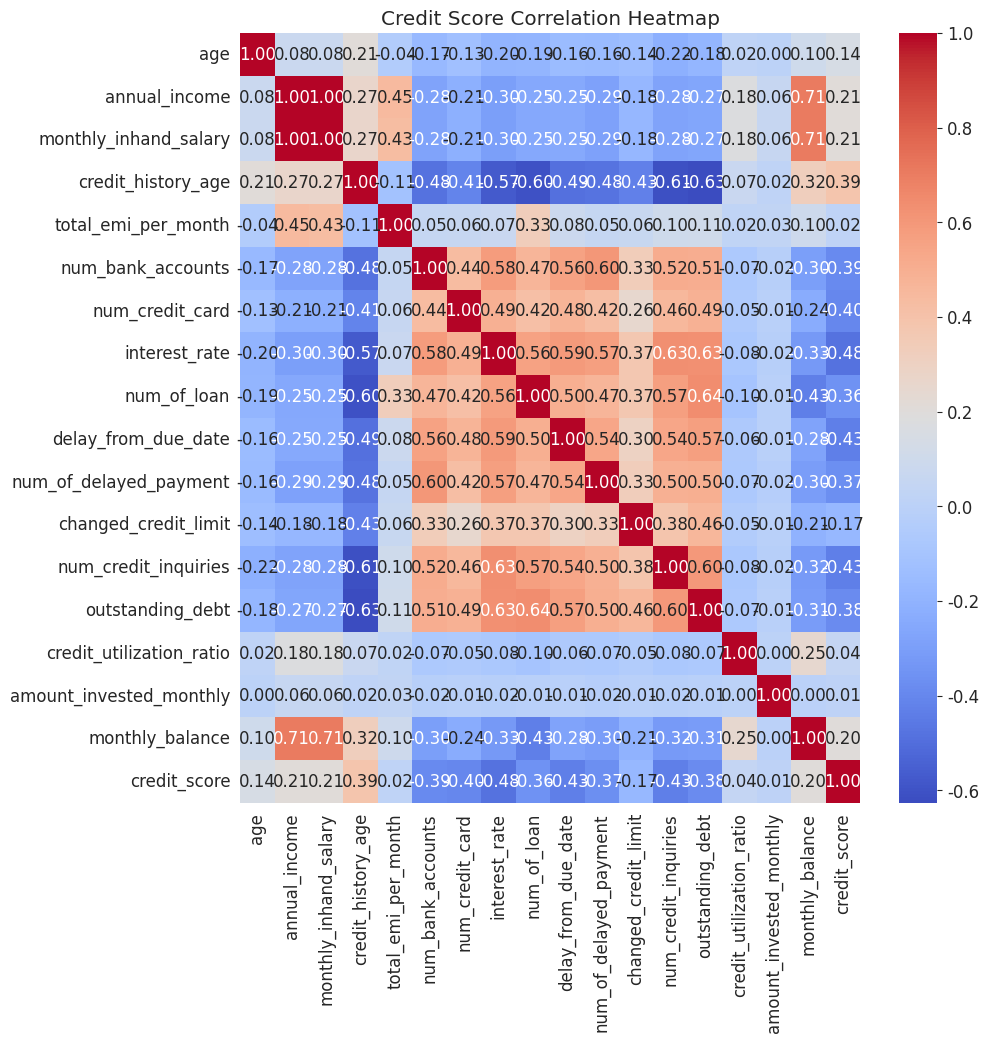

In [17]:
plt.figure(figsize=(10, 10))
plt.title("Credit Score Correlation Heatmap")
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

# 5. 데이터 전처리

In [18]:
df = df.drop(["id", "customer_id", "name", "ssn"], axis=1)

In [19]:
df.head(20)

,month,age,occupation,annual_income,monthly_inhand_salary,credit_history_age,total_emi_per_month,num_bank_accounts,num_credit_card,interest_rate,...,num_credit_inquiries,credit_mix,outstanding_debt,credit_utilization_ratio,payment_of_min_amount,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score,delay_category
0,January,23,Scientist,19114.12,1824.8434,89,49.574947,3,4,3,...,4,Good,809.98,26.822620,No,80.415300,High_spent_Small_value_payments,312.49408,2,Low
1,February,23,Scientist,19114.12,1824.8434,93,49.574947,3,4,3,...,4,Good,809.98,31.944960,No,118.280220,Low_spent_Large_value_payments,284.62915,2,Low
2,March,23,Scientist,19114.12,1824.8434,91,49.574947,3,4,3,...,4,Good,809.98,28.609352,No,81.699524,Low_spent_Medium_value_payments,331.20987,2,Low
3,April,23,Scientist,19114.12,1824.8434,92,49.574947,3,4,3,...,4,Good,809.98,31.377861,No,199.458070,Low_spent_Small_value_payments,223.45131,2,Low
4,May,23,Scientist,19114.12,1824.8434,93,49.574947,3,4,3,...,4,Good,809.98,24.797346,No,41.420155,High_spent_Medium_value_payments,341.48923,2,Low
5,June,23,Scientist,19114.12,1824.8434,94,49.574947,3,4,3,...,4,Good,809.98,27.262259,No,62.430172,High_spent_Medium_value_payments,340.47922,2,Low
6,July,23,Scientist,19114.12,1824.8434,95,49.574947,3,4,3,...,4,Good,809.98,22.537594,No,178.344070,Low_spent_Small_value_payments,244.56532,2,Low
7,August,23,Scientist,19114.12,1824.8434,99,49.574947,3,4,3,...,4,Good,809.98,23.933794,No,24.785217,High_spent_Medium_value_payments,358.12418,1,Low
8,January,28,Teacher,34847.84,3037.9866,111,18.816216,2,4,6,...,2,Good,605.03,24.464031,No,104.291824,Low_spent_Small_value_payments,470.69060,1,Low
9,February,28,Teacher,34847.84,3037.9866,112,18.816216,2,4,6,...,2,Good,605.03,38.550850,No,40.391240,High_spent_Large_value_payments,484.59122,2,Low


In [20]:
month_map = {
    'January': 1,
    'February': 2,
    'March': 3,
    'April': 4,
    'May': 5,
    'June': 6,
    'July': 7,
    'August': 8
}

df['month'] = df['month'].map(month_map)
df['month'] = pd.to_numeric(df['month'])

In [21]:
df = pd.get_dummies(df, columns=['occupation'], dtype=int)

In [22]:
df.head()

,month,age,annual_income,monthly_inhand_salary,credit_history_age,total_emi_per_month,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,...,occupation_Entrepreneur,occupation_Journalist,occupation_Lawyer,occupation_Manager,occupation_Mechanic,occupation_Media_Manager,occupation_Musician,occupation_Scientist,occupation_Teacher,occupation_Writer
0,1,23,19114.12,1824.8434,89,49.574947,3,4,3,4,...,0,0,0,0,0,0,0,1,0,0
1,2,23,19114.12,1824.8434,93,49.574947,3,4,3,4,...,0,0,0,0,0,0,0,1,0,0
2,3,23,19114.12,1824.8434,91,49.574947,3,4,3,4,...,0,0,0,0,0,0,0,1,0,0
3,4,23,19114.12,1824.8434,92,49.574947,3,4,3,4,...,0,0,0,0,0,0,0,1,0,0
4,5,23,19114.12,1824.8434,93,49.574947,3,4,3,4,...,0,0,0,0,0,0,0,1,0,0


In [23]:
credit_mix_map = {
    'Good': 2,
    'Standard': 1,
    'Bad': 0
}

df['credit_mix'] = df['credit_mix'].map(credit_mix_map)
df['credit_mix'] = pd.to_numeric(df['credit_mix'])

In [24]:
payment_of_min_amount_map = {
    'Yes': 1,
    'No': 0
}

df['payment_of_min_amount'] = df['payment_of_min_amount'].map(payment_of_min_amount_map)
df['payment_of_min_amount'] = pd.to_numeric(df['payment_of_min_amount'])

In [25]:
payment_behavior_map = {
    'High_spent_Large_value_payments': 6,
    'High_spent_Medium_value_payments': 5,
    'High_spent_Small_value_payments': 4,
    'Low_spent_Large_value_payments': 3,
    'Low_spent_Medium_value_payments': 2,
    'Low_spent_Small_value_payments': 1
}


df['payment_behaviour'] = df['payment_behaviour'].map(payment_behavior_map)
df['payment_behaviour'] = pd.to_numeric(df['payment_behaviour'])


In [26]:
unique_loan_types = ['Auto Loan', 'Credit-Builder Loan', 'Debt Consolidation Loan', 'Home Equity Loan', 'Mortgage Loan',
                     'No Loan', 'Not Specified', 'Payday Loan', 'Personal Loan', 'Student Loan']

for loan_type in unique_loan_types:
    loan_type2 = loan_type.replace(' ', '_').replace('-', '_').lower()
    df[loan_type2] = df['type_of_loan'].apply(lambda x: x.count(loan_type))

In [27]:
df.head(20)

,month,age,annual_income,monthly_inhand_salary,credit_history_age,total_emi_per_month,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,...,auto_loan,credit_builder_loan,debt_consolidation_loan,home_equity_loan,mortgage_loan,no_loan,not_specified,payday_loan,personal_loan,student_loan
0,1,23,19114.12,1824.8434,89,49.574947,3,4,3,4,...,1,1,0,1,0,0,0,0,1,0
1,2,23,19114.12,1824.8434,93,49.574947,3,4,3,4,...,1,1,0,1,0,0,0,0,1,0
2,3,23,19114.12,1824.8434,91,49.574947,3,4,3,4,...,1,1,0,1,0,0,0,0,1,0
3,4,23,19114.12,1824.8434,92,49.574947,3,4,3,4,...,1,1,0,1,0,0,0,0,1,0
4,5,23,19114.12,1824.8434,93,49.574947,3,4,3,4,...,1,1,0,1,0,0,0,0,1,0
5,6,23,19114.12,1824.8434,94,49.574947,3,4,3,4,...,1,1,0,1,0,0,0,0,1,0
6,7,23,19114.12,1824.8434,95,49.574947,3,4,3,4,...,1,1,0,1,0,0,0,0,1,0
7,8,23,19114.12,1824.8434,99,49.574947,3,4,3,4,...,1,1,0,1,0,0,0,0,1,0
8,1,28,34847.84,3037.9866,111,18.816216,2,4,6,1,...,0,1,0,0,0,0,0,0,0,0
9,2,28,34847.84,3037.9866,112,18.816216,2,4,6,1,...,0,1,0,0,0,0,0,0,0,0


In [28]:
# 2:Good, 1: Standard, 0: Poor
df["credit_score"].value_counts()
df["credit_score"].value_counts(normalize = True)

,proportion
credit_score,
1,0.532628
0,0.284241
2,0.183131


# 6. Feature / Target 분리 및 데이터 분할



In [29]:
# Task 1: Classification
# Target: credit_score
y_clf = df['credit_score']

# Task 2: Regression
# Target: delay_from_due_date
y_reg = df['delay_from_due_date']

# Features (두 타겟 및 문자열/범주형 컬럼 모두 제외)
X = df.drop(['credit_score', 'delay_from_due_date', 'type_of_loan', 'delay_category'], axis=1)

print(f"Features shape: {X.shape}")
print(f"Classification Target shape: {y_clf.shape}")
print(f"Regression Target shape: {y_reg.shape}")

Features shape: (96696, 45)
Classification Target shape: (96696,)
Regression Target shape: (96696,)


In [30]:
# Train / Validation / Test 분할 (8:1:1)

# === Classification ===
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    X, y_clf, test_size=0.1, stratify=y_clf, random_state=RANDOM_STATE
)
X_train_clf, X_val_clf, y_train_clf, y_val_clf = train_test_split(
    X_train_clf, y_train_clf, test_size=0.111, stratify=y_train_clf, random_state=RANDOM_STATE
)  # 0.111 ≈ 1/9 -> 최종 비율 8:1:1

# === Regression ===
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X, y_reg, test_size=0.1, random_state=RANDOM_STATE
)
X_train_reg, X_val_reg, y_train_reg, y_val_reg = train_test_split(
    X_train_reg, y_train_reg, test_size=0.111, random_state=RANDOM_STATE
)

print("=== Classification 데이터 분할 ===")
print(f"Train: {X_train_clf.shape[0]:,} | Val: {X_val_clf.shape[0]:,} | Test: {X_test_clf.shape[0]:,}")
print(f"\n=== Regression 데이터 분할 ===")
print(f"Train: {X_train_reg.shape[0]:,} | Val: {X_val_reg.shape[0]:,} | Test: {X_test_reg.shape[0]:,}")

=== Classification 데이터 분할 ===
Train: 77,366 | Val: 9,660 | Test: 9,670

=== Regression 데이터 분할 ===
Train: 77,366 | Val: 9,660 | Test: 9,670


In [31]:
import pickle

# 저장 경로 (기존 데이터와 같은 폴더)
SAVE_PATH = '/content/drive/MyDrive/preprocessed_data.pkl'

# 전처리된 데이터 딕셔너리로 묶기
data_dict = {
    # Classification
    'X_train_clf': X_train_clf,
    'X_val_clf': X_val_clf,
    'X_test_clf': X_test_clf,
    'y_train_clf': y_train_clf,
    'y_val_clf': y_val_clf,
    'y_test_clf': y_test_clf,
    # Regression
    'X_train_reg': X_train_reg,
    'X_val_reg': X_val_reg,
    'X_test_reg': X_test_reg,
    'y_train_reg': y_train_reg,
    'y_val_reg': y_val_reg,
    'y_test_reg': y_test_reg,
}

# 저장
with open(SAVE_PATH, 'wb') as f:
    pickle.dump(data_dict, f)

print(f"✅ 저장 완료: {SAVE_PATH}")

✅ 저장 완료: /content/drive/MyDrive/preprocessed_data.pkl


불러오기

In [32]:
# import pickle
# import pandas as pd

# # Google Drive 마운트
# from google.colab import drive
# drive.mount('/content/drive')

# # 데이터 불러오기
# LOAD_PATH = '/content/drive/MyDrive/preprocessed_data.pkl'

# with open(LOAD_PATH, 'rb') as f:
#     data = pickle.load(f)

# # 변수로 꺼내기
# X_train_clf = data['X_train_clf']
# X_val_clf = data['X_val_clf']
# X_test_clf = data['X_test_clf']
# y_train_clf = data['y_train_clf']
# y_val_clf = data['y_val_clf']
# y_test_clf = data['y_test_clf']

# X_train_reg = data['X_train_reg']
# X_val_reg = data['X_val_reg']
# X_test_reg = data['X_test_reg']
# y_train_reg = data['y_train_reg']
# y_val_reg = data['y_val_reg']
# y_test_reg = data['y_test_reg']

# print(f"✅ 데이터 로드 완료!")
# print(f"Classification Train: {X_train_clf.shape}")
# print(f"Regression Train: {X_train_reg.shape}")